In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import (MinMaxScaler,StandardScaler)   
from sklearn.model_selection import GridSearchCV



from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import (Lasso, Ridge,ElasticNet, LassoCV, RidgeCV, ElasticNetCV)



In [2]:
file_path = "F:/YES-BANK-STOCK-CLOSING-PRICE-PREDECTION/notebooks/data/data_YesBank_StockPrices.csv"
data = pd.read_csv(file_path)

In [3]:
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [4]:
data['Mean_OHL'] = data[['Open', 'High', 'Low']].mean(axis=1).round(2)


In [5]:
data.head()

,Date,Open,High,Low,Close,Mean_OHL
0,Jul-05,13.00,14.00,11.25,12.46,12.75
1,Aug-05,12.58,14.88,12.55,13.42,13.34
2,Sep-05,13.48,14.87,12.27,13.30,13.54
3,Oct-05,13.20,14.47,12.40,12.99,13.36
4,Nov-05,13.35,13.88,12.88,13.41,13.37


In [6]:
# use lags as additional features
for i in range(1, 13):
    data["lag_{}".format(i)] = data.Mean_OHL.shift(i)

In [7]:
data.set_index('Date', inplace=True)
data.head(20)


,Open,High,Low,Close,Mean_OHL,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
Date,,,,,,,,,,,,,,,,,
Jul-05,13.00,14.00,11.25,12.46,12.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aug-05,12.58,14.88,12.55,13.42,13.34,12.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sep-05,13.48,14.87,12.27,13.30,13.54,13.34,12.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oct-05,13.20,14.47,12.40,12.99,13.36,13.54,13.34,12.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nov-05,13.35,13.88,12.88,13.41,13.37,13.36,13.54,13.34,12.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dec-05,13.49,14.44,13.00,13.71,13.64,13.37,13.36,13.54,13.34,12.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jan-06,13.68,17.16,13.58,15.33,14.81,13.64,13.37,13.36,13.54,13.34,12.75,NaN,NaN,NaN,NaN,NaN,NaN
Feb-06,15.50,16.97,15.40,16.12,15.96,14.81,13.64,13.37,13.36,13.54,13.34,12.75,NaN,NaN,NaN,NaN,NaN
Mar-06,16.20,20.95,16.02,20.08,17.72,15.96,14.81,13.64,13.37,13.36,13.54,13.34,12.75,NaN,NaN,NaN,NaN


In [8]:

#independent_variables1=['Open','Price_Range']
#independent_variables1
y_depend = data.dropna().Close.values
x_independ = data.dropna().drop(['Close','Open','High','Low'], axis=1)


In [9]:
x_independ.head()

,Mean_OHL,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
Date,,,,,,,,,,,,,
Jul-06,15.67,16.67,19.13,19.79,17.72,15.96,14.81,13.64,13.37,13.36,13.54,13.34,12.75
Aug-06,16.73,15.67,16.67,19.13,19.79,17.72,15.96,14.81,13.64,13.37,13.36,13.54,13.34
Sep-06,17.89,16.73,15.67,16.67,19.13,19.79,17.72,15.96,14.81,13.64,13.37,13.36,13.54
Oct-06,20.49,17.89,16.73,15.67,16.67,19.13,19.79,17.72,15.96,14.81,13.64,13.37,13.36
Nov-06,24.22,20.49,17.89,16.73,15.67,16.67,19.13,19.79,17.72,15.96,14.81,13.64,13.37


In [10]:

# Transform Your data

x_independ['Mean_OHL'] = np.log10(x_independ['Mean_OHL'])

# Create the dependent variable data
Y = np.log10(y_depend)

x_independ.values

array([[ 1.195069  , 16.67      , 19.13      , ..., 13.54      ,
        13.34      , 12.75      ],
       [ 1.22349594, 15.67      , 16.67      , ..., 13.36      ,
        13.54      , 13.34      ],
       [ 1.25261034, 16.73      , 15.67      , ..., 13.37      ,
        13.36      , 13.54      ],
       ...,
       [ 1.15014216, 13.67      , 21.67      , ..., 68.77      ,
        49.23      , 57.67      ],
       [ 1.11859537, 14.13      , 13.67      , ..., 60.4       ,
        68.77      , 49.23      ],
       [ 1.11958577, 13.14      , 14.13      , ..., 43.98      ,
        60.4       , 68.77      ]])

In [11]:
# Scaling your data

#after train_test_split
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_independ.values)

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)

(138, 13)
(35, 13)


### ML Model -1 : Linear regression

We are implementing Basic Linear regression model.

The linear regression model assumes that the relationship between the dependent variable (Close) and the independent variables is linear, which means that the change in the dependent variable is proportional to the change in the independent variables.

During the training process, the linear regression model tries to find the values of the coefficients that minimize the sum of the squared differences between the predicted values and the actual values of the dependent variable.

In [13]:
# ML Model - 1 Implementation
# Fit the Algorithm
Lr_modle = LinearRegression().fit(X_train, y_train)

In [14]:
# Calculating the R-squared value 
Lr_modle.score(X_train,y_train)

0.9843542106507833

In [15]:

# Predicting our test data.
y_train_pred= Lr_modle.predict(X_train)
y_test_pred = Lr_modle.predict(X_test)


In [16]:

comparision_trans = pd.DataFrame(zip(10**(y_test), 10**(y_test_pred)), columns = ['actual', 'pred'])
comparision_trans.head()

,actual,pred
0,88.14,87.713555
1,149.38,142.253058
2,49.42,50.537773
3,70.07,73.125251
4,62.54,61.991771


In [17]:
print("y_train vs y_train_pred")
train_MAE = mean_absolute_error(10**(y_train),(10**y_train_pred))
print(f"Mean Absolute Error : {train_MAE}")

train_MSE  = mean_squared_error(10**(y_train), 10**(y_train_pred))
print("MSE :" , train_MSE)

train_RMSE = np.sqrt(train_MSE)
print("RMSE :" ,train_RMSE)

train_r2 = r2_score(10**(y_train), 10**(y_train_pred))
print("R2 :" ,train_r2)

train_adjusted_r2=1-(1-r2_score(10**(y_train), 10**(y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2)

print('\n')

print("y_test vs y_test_pred")
MAE = mean_absolute_error(10**(y_test),(10**y_test_pred))
print(f"Mean Absolute Error : {MAE}")

MSE  = mean_squared_error(10**(y_test), 10**(y_test_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_test_pred))
print("R2 :" ,r2)

adjusted_r2=1-(1-r2_score(10**(y_test), 10**(y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2)


y_train vs y_train_pred
Mean Absolute Error : 7.979219830683484
MSE : 165.74603751445213
RMSE : 12.8742392984771
R2 : 0.9842309865200037
Adjusted R2: 0.9825777834938751


y_test vs y_test_pred
Mean Absolute Error : 7.630075555467944
MSE : 247.4032758079798
RMSE : 15.729058325531755
R2 : 0.9627188732360262
Adjusted R2: 0.9396400804773758


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

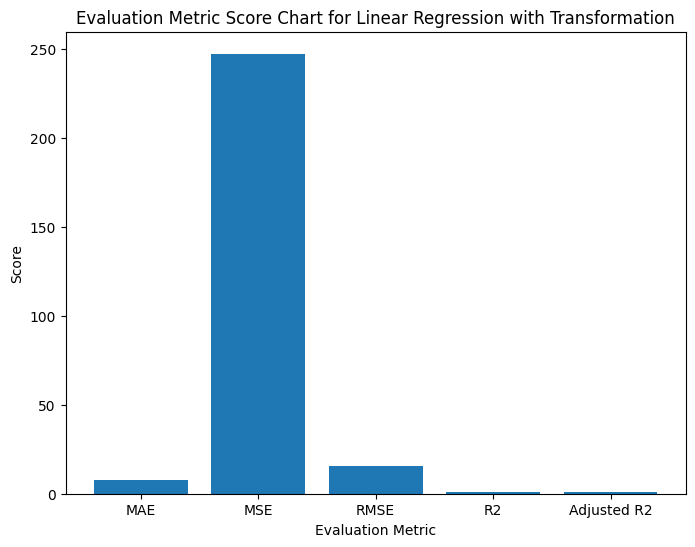

In [18]:

# Visualizing evaluation Metric Score chart
metrics = ['MAE','MSE', 'RMSE', 'R2', 'Adjusted R2']
scores = [MAE,MSE,RMSE,r2,adjusted_r2]

# Plot the evaluation metric score chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metric Score Chart for Linear Regression with Transformation')
plt.show()
     

#####  Ploting the Actival vs Preadected Valuse

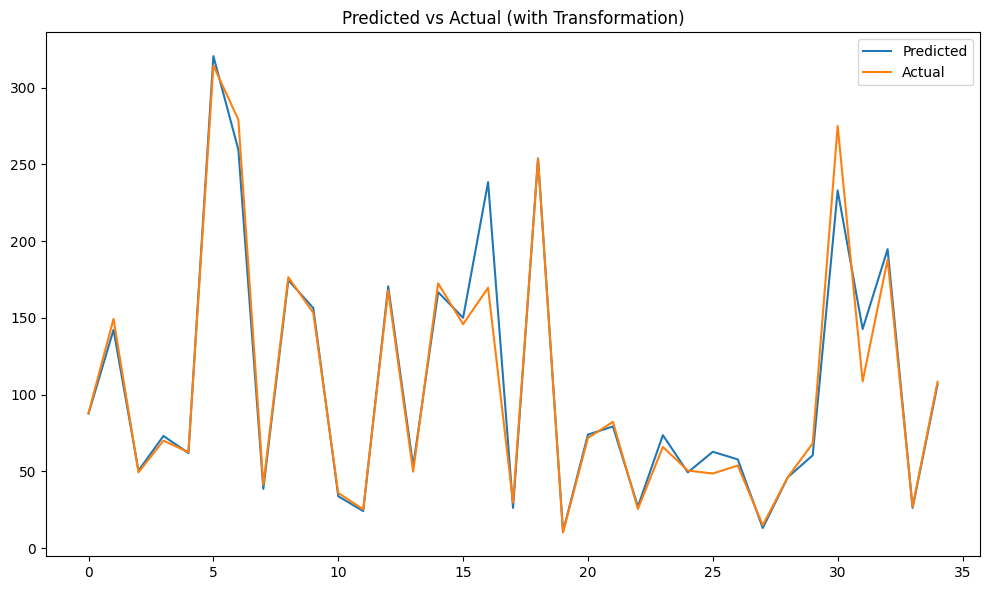

In [19]:
#visualizing actual and predicted data


fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6))

# Plot with transformation
ax1.plot(10 ** (y_test_pred))
ax1.plot(np.array(10 ** (y_test)))
ax1.legend(["Predicted", "Actual"])
ax1.set_title("Predicted vs Actual (with Transformation)")


plt.tight_layout()
plt.show()

C:\Users\gouse\AppData\Local\Temp\ipykernel_23196\2278833175.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(10**(y_test) - 10**(y_test_pred), bins=20)


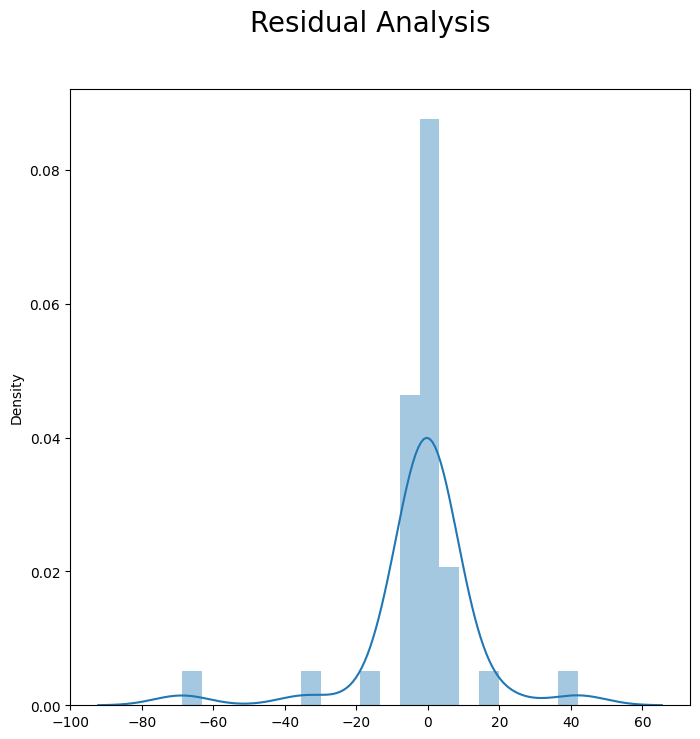

In [20]:

# Create a figure with a specified size
fig = plt.figure(figsize=(8, 8))

# Create a distribution plot (histogram) of the residuals
sns.distplot(10**(y_test) - 10**(y_test_pred), bins=20)

# Set the title for the plot
fig.suptitle('Residual Analysis', fontsize=20)

# Show the plot
plt.show()

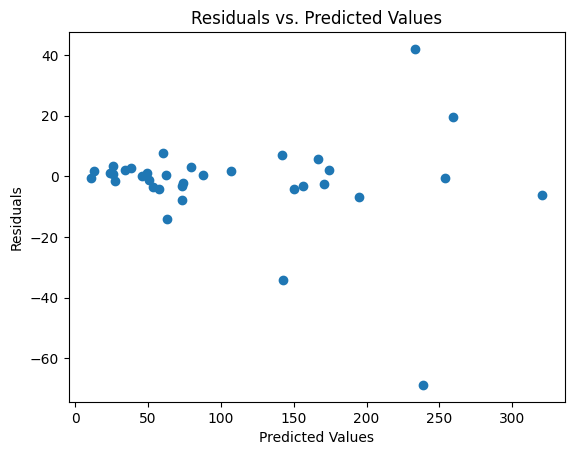

In [21]:
residuals = 10**(y_test)-10**(y_test_pred)

# Plot the residuals against the predicted values
plt.scatter( 10**(y_test_pred),residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

In [22]:
linear_regessor_list ={'Train Mean Absolute Error':train_MAE,
                       'Train Mean squared Error' : train_MSE,
                       'Train Root Mean squared Error' : train_RMSE,
                       'Train R2 score' : train_r2,
                       'Train Adjusted R2 score' : train_adjusted_r2,
                       'Mean Absolute Error':MAE,
                       'Mean squared Error' : MSE,
                       'Root Mean squared Error' : RMSE,
                       'R2 score' : r2,
                       'Adjusted R2 score' : adjusted_r2 }
metrics = pd.DataFrame.from_dict(linear_regessor_list, orient='index').reset_index()
metrics = metrics.rename(columns={'index':'Metric',0:'reg_with_transformation'})
metrics

,Metric,reg_with_transformation
0,Train Mean Absolute Error,7.979220
1,Train Mean squared Error,165.746038
2,Train Root Mean squared Error,12.874239
3,Train R2 score,0.984231
4,Train Adjusted R2 score,0.982578
5,Mean Absolute Error,7.630076
6,Mean squared Error,247.403276
7,Root Mean squared Error,15.729058
8,R2 score,0.962719
9,Adjusted R2 score,0.939640


The Root Mean Squared Error (RMSE) is slightly higher on the test set (15.729058) compared to the training set (12.874239), indicating a slightly larger average magnitude of error in predicting the 'Close' values on the test set.

The R2 Score is slightly lower on the test set (0.962719) compared to the training set (0.984231), suggesting that the model explains a slightly lower proportion of the variance in the 'Close' variable on the test set.

The Adjusted R2 Score is also lower on the test set (0.939640) compared to the training set (0.984231), accounting for the complexity of the model and the number of independent variables.

Overall, the model performs well on both the training and test sets, but there is a slightly higher level of error and slightly lower explanatory power on the test set, which is expected as the test set represents unseen data.

#### Cross- Validation & Hyperparameter Tuning

In [23]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameter = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

# Create the grid search object
Lr_gs=GridSearchCV(Lr_modle,param_grid=parameter,cv=5,scoring='r2')
# cv = 5 It means the data dplet into 5 parts and perfoming  the model will be trained and tested on different combinations of these parts.

# Fit the Algorithm
Lr_gs.fit(X_train,y_train)

# Predict on the model
y_pred_test_gs=Lr_gs.predict(X_test)
y_pred_train_gs=Lr_gs.predict(X_train)

In [24]:
# Metric Score for train set
train_MAE_gs = mean_absolute_error(10**(y_train),(10**y_pred_train_gs))
print(f"Mean Absolute Error : {train_MAE_gs}")


train_MSE_gs  = mean_squared_error(10**(y_train), 10**(y_pred_train_gs))
print("MSE :" , train_MSE_gs)

train_RMSE_gs = np.sqrt(train_MSE_gs)
print("RMSE :" ,train_RMSE_gs)

train_r2_gs = r2_score(10**(y_train), 10**(y_pred_train_gs))
print("R2 :" ,train_r2_gs)

train_adjusted_r2_gs=1-(1-r2_score(10**(y_train), 10**(y_pred_train_gs)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_gs)

print('\n')

# Metric Score for test set
MAE_gs = mean_absolute_error(10**(y_test),(10**y_pred_test_gs))
print(f"Mean Absolute Error : {MAE_gs}")

MSE_gs  = mean_squared_error(10**(y_test), 10**(y_pred_test_gs))
print("MSE :" , MSE_gs)

RMSE_gs = np.sqrt(MSE_gs)
print("RMSE :" ,RMSE_gs)

r2_gs = r2_score(10**(y_test), 10**(y_pred_test_gs))
print("R2 :" ,r2_gs)

adjusted_r2_gs=1-(1-r2_score(10**(y_test), 10**(y_pred_test_gs)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_gs)
     

Mean Absolute Error : 8.185561637606824
MSE : 222.4837968037266
RMSE : 14.915890747914675
R2 : 0.9788329781906684
Adjusted R2: 0.9766138549364642


Mean Absolute Error : 7.184689713295233
MSE : 128.3933629035817
RMSE : 11.331079511837418
R2 : 0.9806524419596754
Adjusted R2: 0.9686753822204268


The MAE and RMSE values for the test set are lower than those for the train set, indicating better performance on the test data.

The R2 score for the test set is slightly higher than that for the train set, suggesting that the model generalizes well to unseen data.

However, the adjusted R2 score for the test set is lower than that for the train set, indicating that the model may be overfitting to the training data.

Overall, the model shows good performance on both the train and test sets, with low errors and high R2 scores. However, it is important to monitor the adjusted R2 score and consider potential overfitting when interpreting the results. To overcome that, we can apply regularization techniques.

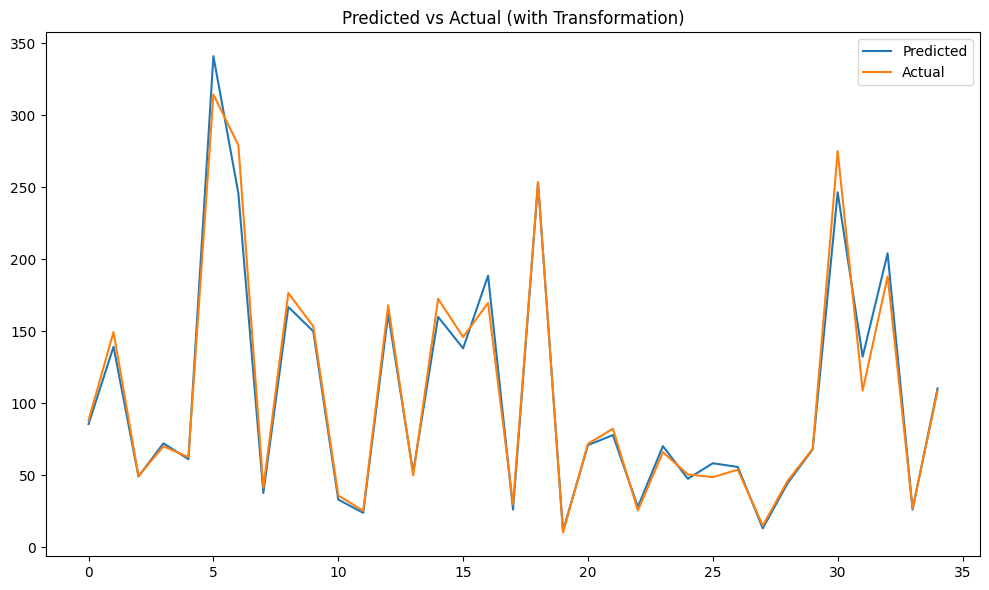

In [25]:

plt.figure(figsize=(10, 6))

# Plot with transformation
plt.plot(10 ** (y_pred_test_gs))
plt.plot(np.array(10 ** (y_test)))
plt.legend(["Predicted", "Actual"])
plt.title("Predicted vs Actual (with Transformation)")

plt.tight_layout()
plt.show()

C:\Users\gouse\AppData\Local\Temp\ipykernel_23196\2282343908.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((10**(y_test)- 10**(y_pred_test_gs)),bins=20)


Text(0.5, 0.98, 'Residual Analysis')

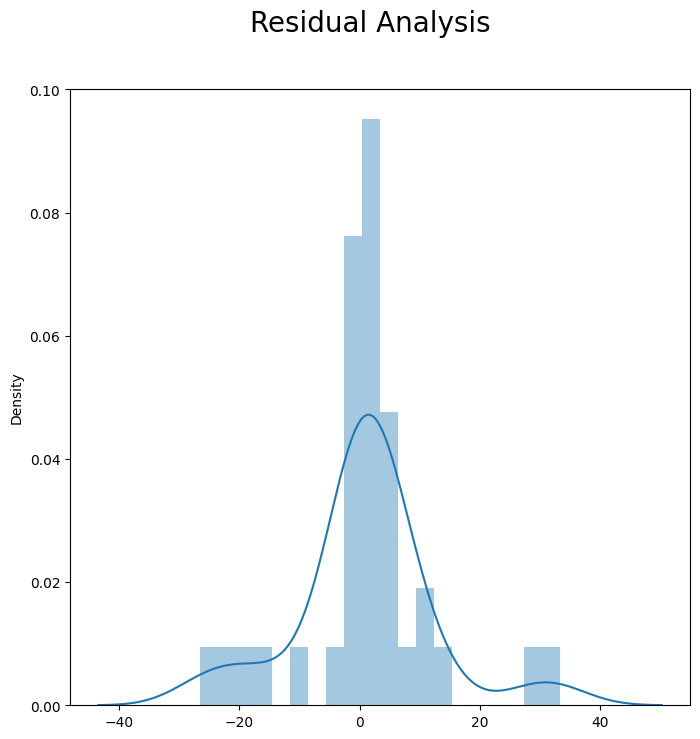

In [26]:
fig=plt.figure(figsize=(8,8))

sns.distplot((10**(y_test)- 10**(y_pred_test_gs)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

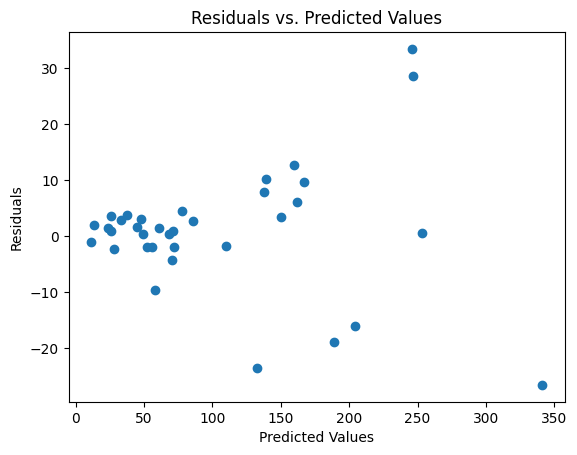

In [27]:

#Homoscadasticity
residuals = 10**(y_test)-10**(y_pred_test_gs)

# Plot the residuals against the predicted values
plt.scatter( 10**(y_pred_test_gs),residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


In [28]:
np.mean(residuals)    

0.8721064355038071

All the assumptions of Linear Regression is being taken care. Mean of Residuals is nearly zero, and there is no hetroscadasticity.

In [29]:
metrics['Lr_gs'] = [train_MAE_gs, train_MSE_gs, train_RMSE_gs, train_r2_gs, train_adjusted_r2_gs, MAE_gs,MSE_gs,RMSE_gs,r2_gs,adjusted_r2_gs]

In [30]:
metrics

,Metric,reg_with_transformation,Lr_gs
0,Train Mean Absolute Error,7.979220,8.185562
1,Train Mean squared Error,165.746038,222.483797
2,Train Root Mean squared Error,12.874239,14.915891
3,Train R2 score,0.984231,0.978833
4,Train Adjusted R2 score,0.982578,0.976614
5,Mean Absolute Error,7.630076,7.184690
6,Mean squared Error,247.403276,128.393363
7,Root Mean squared Error,15.729058,11.331080
8,R2 score,0.962719,0.980652
9,Adjusted R2 score,0.939640,0.968675


### Ridge Regression (L2 Regularization):

Ridge adds a penalty term to the loss function that shrinks the coefficients towards zero without eliminating them completely.

It can be useful when dealing with multicollinearity, as it reduces the impact of highly correlated features.

Ridge is generally more suitable when all the features are expected to contribute to the model and no feature selection is desired.

I am using this because, I do not want to eliminate my features by using L1 or Elasticnet, as I included Lag values to identify the past trends to predict more accurately.

#### RIDGE with Cross Validation and Hyper parameter tuning

In [31]:

#Ridge Regularization
ridge = Ridge()
parameters2 = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,75,80,100]}
ridge_regressor = GridSearchCV(ridge, parameters2, scoring='r2', cv=10)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   75, 80, 100]},
             scoring='r2')

In [32]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " r2 score is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  r2 score is:  0.9760398054540593


In [33]:
print(ridge_regressor)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   75, 80, 100]},
             scoring='r2')


In [34]:

best_ridge_model1 = ridge_regressor.best_estimator_

print(best_ridge_model1.coef_)
print(best_ridge_model1.intercept_)

[ 0.39514023 -0.01482203  0.00717731  0.02008002 -0.01429122 -0.00188954
  0.06516736 -0.01047715 -0.05517723  0.03438961  0.04428465 -0.05330241
 -0.02729173]
1.8740871151569118


In [35]:
y_train_pred_ridge = ridge_regressor.predict(X_train)
y_test_pred_ridge = ridge_regressor.predict(X_test)

In [36]:
ridge_regressor.score(X_train,y_train)

0.9835229511022769

In [37]:
# Metric Score for train set
train_MAE_ridge = mean_absolute_error(10**(y_train),(10**y_train_pred_ridge))
print(f"Mean Absolute Error : {train_MAE_ridge}")


train_MSE_ridge  = mean_squared_error(10**(y_train), 10**(y_train_pred_ridge))
print("MSE :" , train_MSE_ridge)

train_RMSE_ridge = np.sqrt(train_MSE_ridge)
print("RMSE :" ,train_RMSE_ridge)

train_r2_ridge = r2_score(10**(y_train), 10**(y_train_pred_ridge))
print("R2 :" ,train_r2_ridge)

train_adjusted_r2_ridge=1-(1-r2_score(10**(y_train), 10**(y_train_pred_ridge)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_ridge)

print('\n')

# Metric Score for test set
MAE_ridge = mean_absolute_error(10**(y_test),(10**y_test_pred_ridge))
print(f"Mean Absolute Error : {MAE_ridge}")

MSE_ridge  = mean_squared_error(10**(y_test), 10**(y_test_pred_ridge))
print("MSE :" , MSE_ridge)

RMSE_ridge = np.sqrt(MSE_ridge)
print("RMSE :" ,RMSE_ridge)

r2_ridge = r2_score(10**(y_test), 10**(y_test_pred_ridge))
print("R2 :" ,r2_ridge)

adjusted_r2_ridge=1-(1-r2_score(10**(y_test), 10**(y_test_pred_ridge)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print('Adjusted R2:', adjusted_r2_ridge)
     

Mean Absolute Error : 7.822127647914247
MSE : 165.5507694818343
RMSE : 12.866653390910718
R2 : 0.9842495642446042
Adjusted R2: 0.9825983088831514


Mean Absolute Error : 7.052152124581817
MSE : 173.28832763822624
RMSE : 13.163902447155488
R2 : 0.9738872329466974
Adjusted R2: 0.9711496041427221


MAE has been reduced in test dataset which indicates model is predicting good on unseen data. RMSE is also similar in both cases.

In both cases, the R2 values are relatively high, indicating a good fit of the model to the data. The adjusted R2 values are slightly lower, suggesting that the inclusion of additional independent variables may not contribute significantly to the model's predictive power.

Overall, the model shows good performance on both the train and test datasets, with relatively low errors and high R2 values

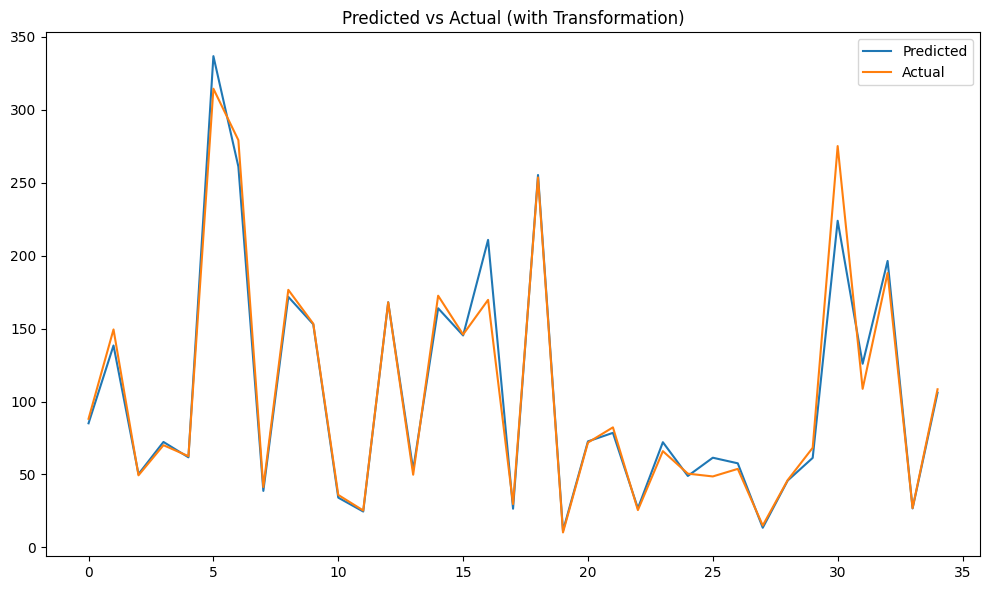

In [38]:
plt.figure(figsize=(10, 6))

# Plot with transformation
plt.plot(10 ** (y_test_pred_ridge))
plt.plot(np.array(10 ** (y_test)))
plt.legend(["Predicted", "Actual"])
plt.title("Predicted vs Actual (with Transformation)")

plt.tight_layout()
plt.show()

C:\Users\gouse\AppData\Local\Temp\ipykernel_23196\3290928204.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((10**(y_test)- 10**(y_test_pred_ridge)),bins=20)


Text(0.5, 0.98, 'Residual Analysis')

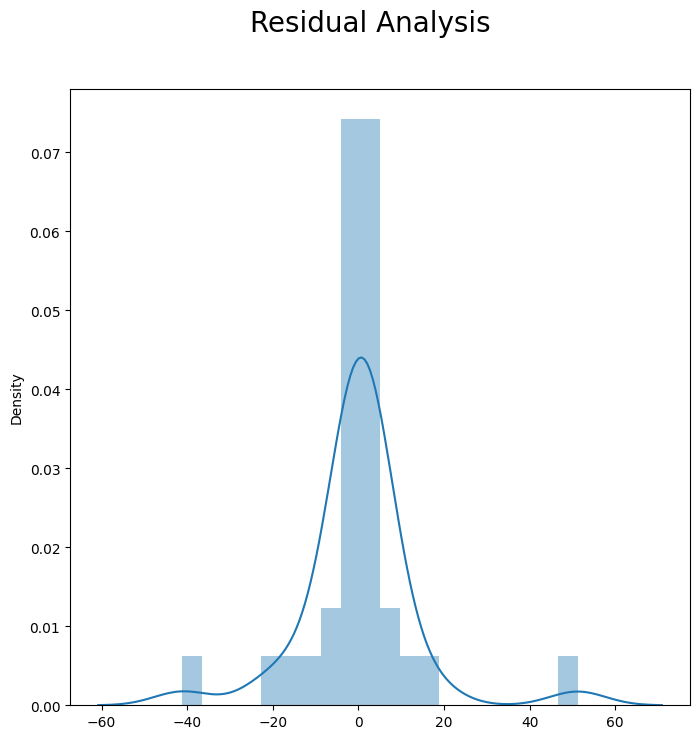

In [39]:

fig=plt.figure(figsize=(8,8))

sns.distplot((10**(y_test)- 10**(y_test_pred_ridge)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

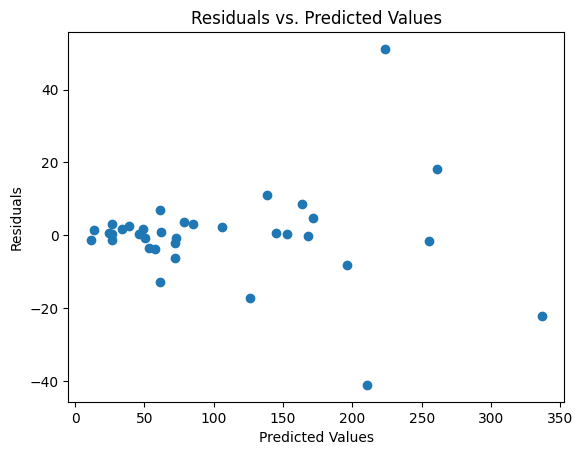

In [40]:

#Homoscadasticity
residuals = 10**(y_test)-10**(y_test_pred_ridge)

# Plot the residuals against the predicted values
plt.scatter( 10**(y_test_pred_ridge),residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


In [41]:
metrics['ridge_regressor'] = [train_MAE_ridge, train_MSE_ridge, train_RMSE_ridge, train_r2_ridge, train_adjusted_r2_ridge,MAE_ridge,MSE_ridge,RMSE_ridge,r2_ridge,adjusted_r2_ridge]   

In [42]:
metrics

,Metric,reg_with_transformation,Lr_gs,ridge_regressor
0,Train Mean Absolute Error,7.979220,8.185562,7.822128
1,Train Mean squared Error,165.746038,222.483797,165.550769
2,Train Root Mean squared Error,12.874239,14.915891,12.866653
3,Train R2 score,0.984231,0.978833,0.984250
4,Train Adjusted R2 score,0.982578,0.976614,0.982598
5,Mean Absolute Error,7.630076,7.184690,7.052152
6,Mean squared Error,247.403276,128.393363,173.288328
7,Root Mean squared Error,15.729058,11.331080,13.163902
8,R2 score,0.962719,0.980652,0.973887
9,Adjusted R2 score,0.939640,0.968675,0.971150


## ML Model - 2
I am going to implement RandomForest model.

Random forest is an ensemble learning algorithm that constructs a multitude of decision trees at training time and outputs the mean prediction of the individual trees as the final prediction.

The RandomForestRegressor class allows you to train a regression model using the random forest algorithm, and then use it to make predictions on new data.

During the training process, the algorithm randomly selects a subset of features and a subset of observations to construct each decision tree.

This helps to reduce overfitting and improve the generalization performance of the model.

In [43]:
# ML Model - 2 Implementation
rf = RandomForestRegressor()

# Fit the Algorithm
rf.fit(X_train,y_train)

# Predict on the model
y_pred_train_rf =rf.predict(X_train)
y_pred_test_rf =rf.predict(X_test)

In [44]:
# Metric Score for train set
train_MAE_rf = mean_absolute_error(10**(y_train),(10**y_pred_train_rf))
print(f"Mean Absolute Error : {train_MAE_rf}")


train_MSE_rf  = mean_squared_error(10**(y_train), 10**(y_pred_train_rf))
print("MSE :" , train_MSE_rf)

train_RMSE_rf = np.sqrt(train_MSE_rf)
print("RMSE :" ,train_RMSE_rf)

train_r2_rf = r2_score(10**(y_train), 10**(y_pred_train_rf))
print("R2 :" ,train_r2_rf)

train_adjusted_r2_rf=1-(1-r2_score(10**(y_train), 10**(y_pred_train_rf)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_rf)

print('\n')

# Metric Score for test set
MAE_rf = mean_absolute_error(10**(y_test),(10**y_pred_test_rf))
print(f"Mean Absolute Error : {MAE_rf}")

MSE_rf  = mean_squared_error(10**(y_test), 10**(y_pred_test_rf))
print("MSE :" , MSE_rf)

RMSE_rf = np.sqrt(MSE_rf)
print("RMSE :" ,RMSE_rf)

r2_rf = r2_score(10**(y_test), 10**(y_pred_test_rf))
print("R2 :" ,r2_rf)

adjusted_r2_rf=1-(1-r2_score(10**(y_test), 10**(y_pred_test_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_rf)



Mean Absolute Error : 4.0259670720666945
MSE : 46.271616443903625
RMSE : 6.802324341275093
R2 : 0.9955977364262388
Adjusted R2: 0.9951362087935058


Mean Absolute Error : 10.650879866461711
MSE : 370.9258811877651
RMSE : 19.259436159653404
R2 : 0.9441052882123814
Adjusted R2: 0.9095037999629032


It can be clearly seen that model is not performed well on unseen data indicating overfitting. Lets overcome that by tuning hyperparameter and using cross validation

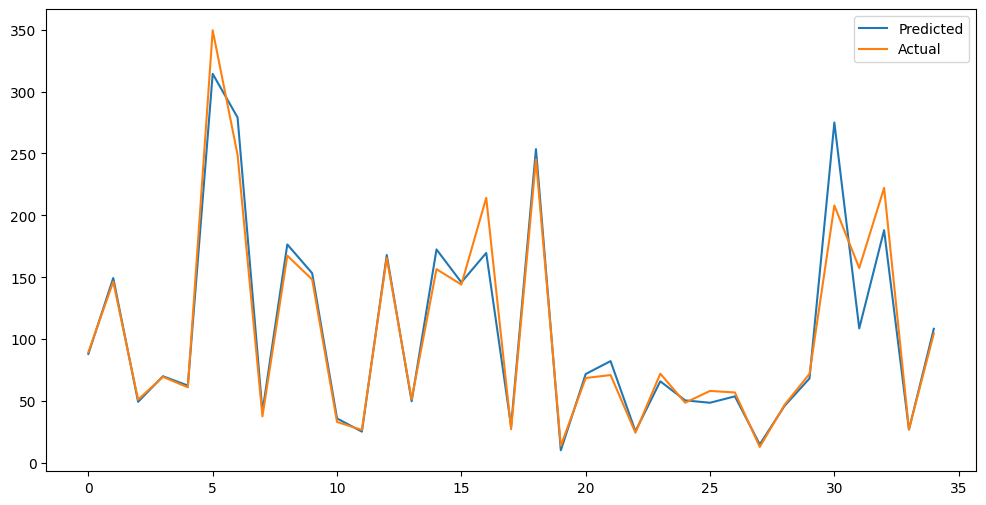

In [45]:

plt.figure(figsize=(12,6))
plt.plot(np.array(10**y_test))
plt.plot(10**((y_pred_test_rf)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [46]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50,80,100,200,300],
    'max_depth': [1,2,6,7,8,9,10,20,30,40],
    'min_samples_split':[10,20,30,40,50,100,150,200],
    'min_samples_leaf': [1,2,8,10,20,40,50]


}


# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(rf, param_grid_rf,verbose=2, cv=5, scoring='r2')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best estimator
best_model_rf_rs = random_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=2, min_samples_leaf=50, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=1, min_samples_leaf=20, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=20, min_samples_split=100, n_estimators=100; total time=   0.2s
[CV] END max_depth=1, min_samples_leaf=20, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=20, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_dept

In [47]:

best_model_rf_rs.feature_importances_
     

array([9.03492481e-01, 8.08232201e-02, 5.93417208e-03, 3.93367337e-04,
       1.04512621e-03, 1.02176897e-03, 1.11595587e-03, 1.13398387e-03,
       3.10651772e-04, 5.13216608e-04, 1.06887605e-03, 1.38264562e-03,
       1.76453437e-03])

In [48]:
print(best_model_rf_rs)

RandomForestRegressor(max_depth=20, min_samples_split=10, n_estimators=300)


In [49]:
# Predict the model
y_pred_train_rf_rs= random_search.predict(X_train)
y_pred_test_rf_rs= random_search.predict(X_test)

In [50]:

random_search.score(X_train,y_train)

0.9895823820204145

In [51]:
# Metric Score for train set
train_MAE_rf_rs = mean_absolute_error(10**(y_train),(10**y_pred_train_rf_rs))
print(f"Mean Absolute Error : {train_MAE_rf_rs}")


train_MSE_rf_rs  = mean_squared_error(10**(y_train), 10**(y_pred_train_rf_rs))
print("MSE :" , train_MSE_rf_rs)

train_RMSE_rf_rs = np.sqrt(train_MSE_rf_rs)
print("RMSE :" ,train_RMSE_rf_rs)

train_r2_rf_rs = r2_score(10**(y_train), 10**(y_pred_train_rf_rs))
print("R2 :" ,train_r2_rf_rs)

train_adjusted_r2_rf_rs=1-(1-r2_score(10**(y_train), 10**(y_pred_train_rf_rs)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_rf_rs)

print('\n')

# Metric Score for test set
MAE_rf_rs = mean_absolute_error(10**(y_test),(10**y_pred_test_rf_rs))
print(f"Mean Absolute Error : {MAE_rf_rs}")

MSE_rf_rs  = mean_squared_error(10**(y_test), 10**(y_pred_test_rf_rs))
print("MSE :" , MSE_rf_rs)

RMSE_rf_rs = np.sqrt(MSE_rf_rs)
print("RMSE :" ,RMSE_rf_rs)

r2_rf_rs = r2_score(10**(y_test), 10**(y_pred_test_rf_rs))
print("R2 :" ,r2_rf_rs)

adjusted_r2_rf_rs=1-(1-r2_score(10**(y_test), 10**(y_pred_test_rf_rs)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_rf_rs)
     

Mean Absolute Error : 6.464802943908722
MSE : 119.46723836592028
RMSE : 10.93010696955525
R2 : 0.9886339334534869
Adjusted R2: 0.9874423297026428


Mean Absolute Error : 10.724362539650274
MSE : 356.25281898542977
RMSE : 18.874660764777463
R2 : 0.9463163676340035
Adjusted R2: 0.9130836428360056


The model has improved than the simple random forest model. it has low adjusted r2 value in test data saying that some additional features are not contributing to the output of y variable.

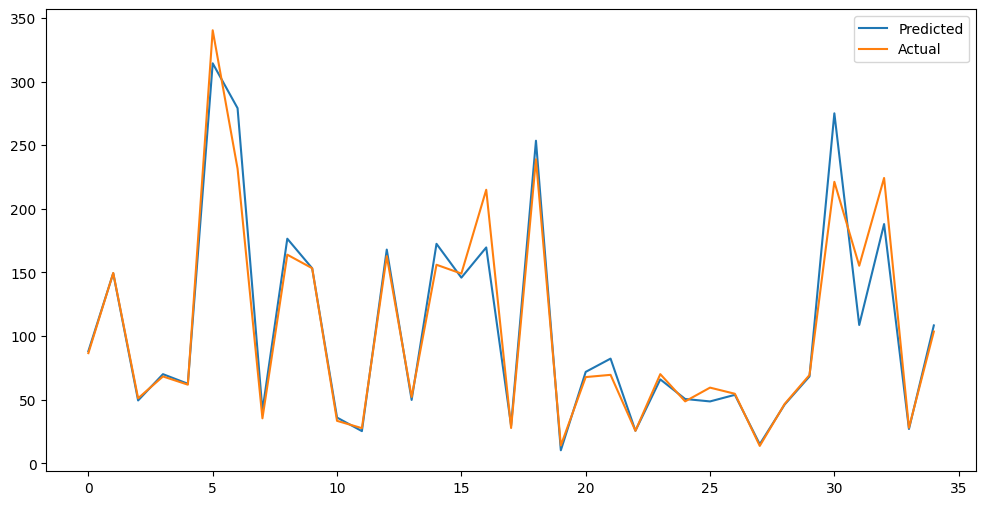

In [52]:
plt.figure(figsize=(12,6))
plt.plot(np.array(10**y_test))
plt.plot(10**((y_pred_test_rf_rs)))
plt.legend(["Predicted","Actual"])
plt.show()

In [53]:
metrics['random_search'] = [train_MAE_rf_rs, train_MSE_rf_rs, train_RMSE_rf_rs, train_r2_rf_rs, train_adjusted_r2_rf_rs,MAE_rf_rs,MSE_rf_rs,RMSE_rf_rs,r2_rf_rs,adjusted_r2_rf_rs]

In [54]:
metrics

,Metric,reg_with_transformation,Lr_gs,ridge_regressor,random_search
0,Train Mean Absolute Error,7.979220,8.185562,7.822128,6.464803
1,Train Mean squared Error,165.746038,222.483797,165.550769,119.467238
2,Train Root Mean squared Error,12.874239,14.915891,12.866653,10.930107
3,Train R2 score,0.984231,0.978833,0.984250,0.988634
4,Train Adjusted R2 score,0.982578,0.976614,0.982598,0.987442
5,Mean Absolute Error,7.630076,7.184690,7.052152,10.724363
6,Mean squared Error,247.403276,128.393363,173.288328,356.252819
7,Root Mean squared Error,15.729058,11.331080,13.163902,18.874661
8,R2 score,0.962719,0.980652,0.973887,0.946316
9,Adjusted R2 score,0.939640,0.968675,0.971150,0.913084
